# Indian Institute of Technology Indore
## Assignment 2
### Course: AA 651 Astronomy Laboratory - I
#### Course Instructor: Dr. Manoneeta Chakraborty
#### Program: M.Sc.Astronomy
#### Student's Name: Prasad Rajesh Posture
#### Roll No.: 2303121013

# Importing Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint, trapz, simps, quad, fixed_quad
from scipy.special import erf, ellipe
import sympy as sp
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Problem 1

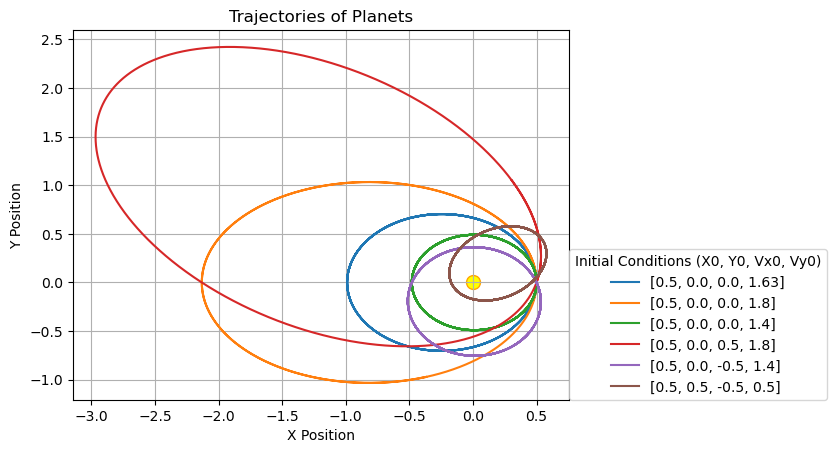

In [2]:
# Given constant and initial conditions
GM = 1

initial_conditions = [
    [0.5, 0.0, 0.0, 1.63],
    [0.5, 0.0, 0.0, 1.80],
    [0.5, 0.0, 0.0, 1.40],
    [0.5, 0.0, 0.50, 1.80],
    [0.5, 0.0, -0.50, 1.40],
    [0.5, 0.50, -0.50, 0.50]
]

# Defining equation of motion using position, velocity and acceleration using ODE
def equations_of_motion(state, t):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    ax = -GM * x / r**3
    ay = -GM * y / r**3
    return [vx, vy, ax, ay]

# Plotting trajectories for each initial condtion
for i in initial_conditions:
    t = np.linspace(0, 18, 1800)  # time points
    states = odeint(equations_of_motion, i, t)
    x_values = states[:, 0]
    y_values = states[:, 1]
    plt.plot(x_values, y_values)
    
plt.scatter(x=0.0, y=0.0,s=100, color='yellow',edgecolors='orange')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Trajectories of Planets')
plt.legend(title="Initial Conditions (X0, Y0, Vx0, Vy0)",loc=(1,0),labels=initial_conditions)
plt.grid()
plt.show()

# Problem 2
The analytical solutions for the same are given in the report. This problem can be solved by two ways using the numerical methods.

#### Method 1
Using simps and trapz methods offered by scipy which caluculate the integral directly for us using the simpsons and trapezoidal rule at the backend.

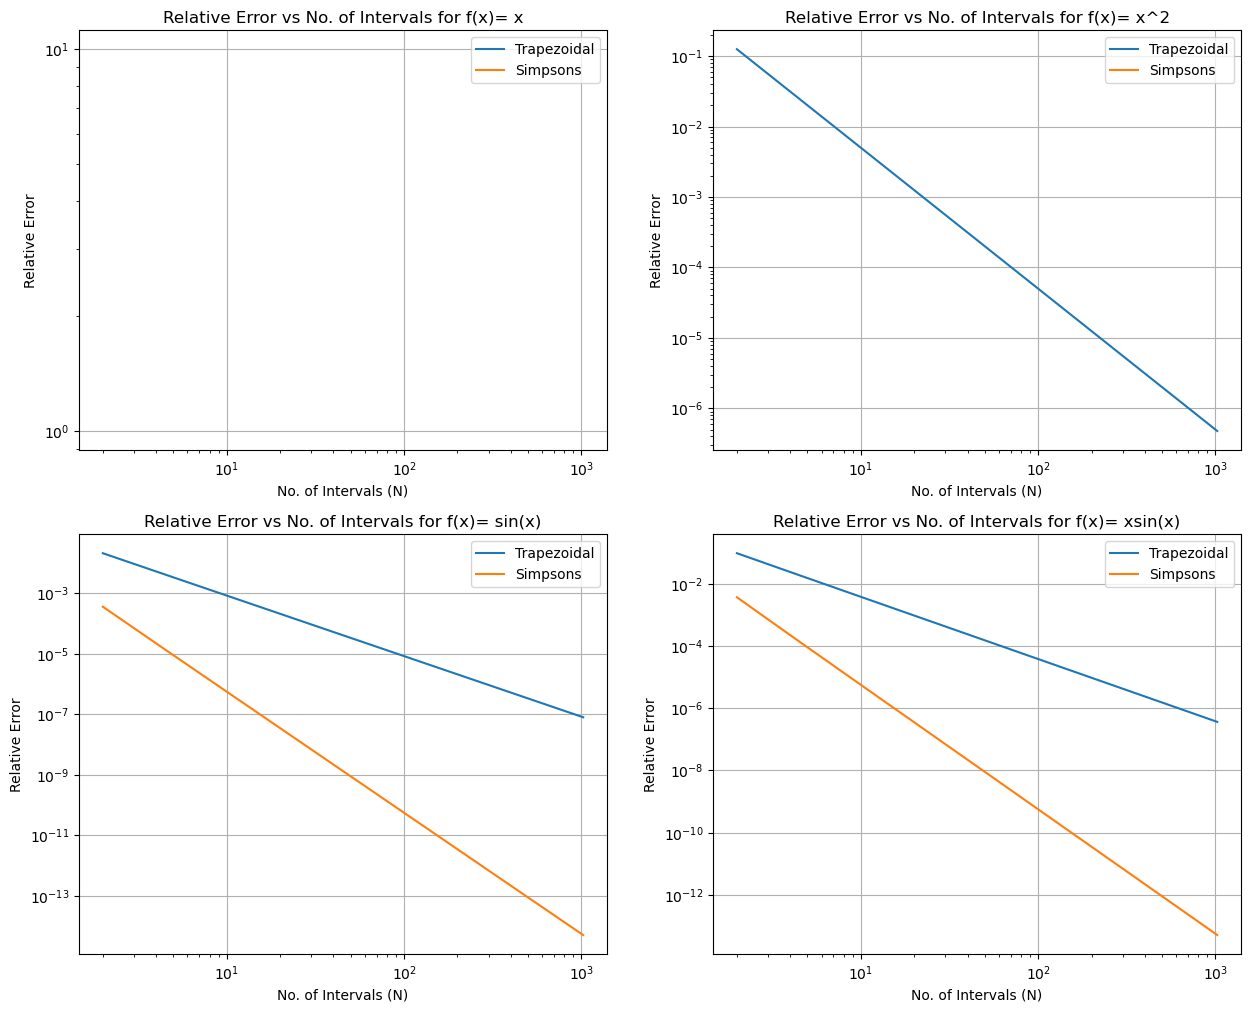

In [3]:
# Function to perform numerical integration using Trapezoidal rule
def trapezoid(func, a, b, N):
    x_values = np.linspace(a, b, N+1)
    y_values = func(x_values)
    return trapz(y_values, dx=(b - a) / N)

# Function to perform numerical integration using Simpson's rule
def simpsons(func, a, b, N):
    x_values = np.linspace(a, b, N+1)
    y_values = func(x_values)
    return simps(y_values, dx=(b - a) / N)

# Define the functions to integrate
def func1(x):
    """x"""
    return x

def func2(x):
    """x^2"""
    return x**2

def func3(x):
    """sin(x)"""
    return np.sin(x)

def func4(x):
    """xsin(x)"""
    return x * np.sin(x)

# Answers of the integrals solves using analytical method
analytical_anss = [1/2, 1/3, 1 - np.cos(1), np.sin(1) - np.cos(1)]

# List of the function to iterate over
functions = [func1, func2, func3, func4]

# Dictionary for storing relative errors for each function occurring due to consequence of using Simpsons and Trapezoidal Method
error_dict={}

# The chunk of code given below"
# Iterates through each of the function from the given list of function
# Calculates integral for each function from the list for trapezoidal and simpsons rule
# Calculates the relative error for each function for each rule and stores them in a dictionary
# Uses the function's docstring as a key for assigned to the values 
# The relative error is stored as a 2D array of 0th for trapezoidal and 1st for simpsons

for func in functions :
    trap_error_func=[]
    simps_error_func=[]
    for i in range(1,11):
        trap_ans = trapezoid(func, 0, 1, N=2**i)
        simps_ans = simpsons(func, 0, 1, N=2**i)
        analytical_ans = analytical_anss[functions.index(func)]
        #print("Trap Answer:",trap_ans,", Relative Error:", abs((trap_ans-analytical_ans)/analytical_ans))
        trap_error_func.append(abs((trap_ans-analytical_ans)/analytical_ans))
        #print("Simps Answer:",simps_ans,", Relative Error:", abs((simps_ans-analytical_ans)/analytical_ans))
        simps_error_func.append(abs((simps_ans-analytical_ans)/analytical_ans))
    error_dict[func.__doc__]=[trap_error_func,simps_error_func]

# The chunk of code contains everything we need to compare the relationship between the errors 
# The keys of the dictionary are converted into a list to iterate over using t as an index
# Using subplot to set a an empty grid and filling the each [i,j] th box with respective plots of the function
# The scale has been changed to log scale to observe variations properly
func = list(error_dict.keys())
t=0
fig, axes = plt.subplots(2,2, figsize=(15, 12))
for i in [0, 1]:
    for j in [0,1]:
        axes[i,j].plot([2**i for i in range(1,11)], error_dict[func[t]][0])
        axes[i,j].plot([2**i for i in range(1,11)], error_dict[func[t]][1])
        axes[i,j].legend(['Trapezoidal', 'Simpsons'])
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_title('Relative Error vs No. of Intervals for f(x)= '+func[t])
        axes[i,j].set_ylabel('Relative Error')
        axes[i,j].set_xlabel('No. of Intervals (N)')
        axes[i,j].grid(True)
        t=t+1

#### Method 2
This method is almost the same but here we define the rules by ourselves as functions and use them over the other functions.

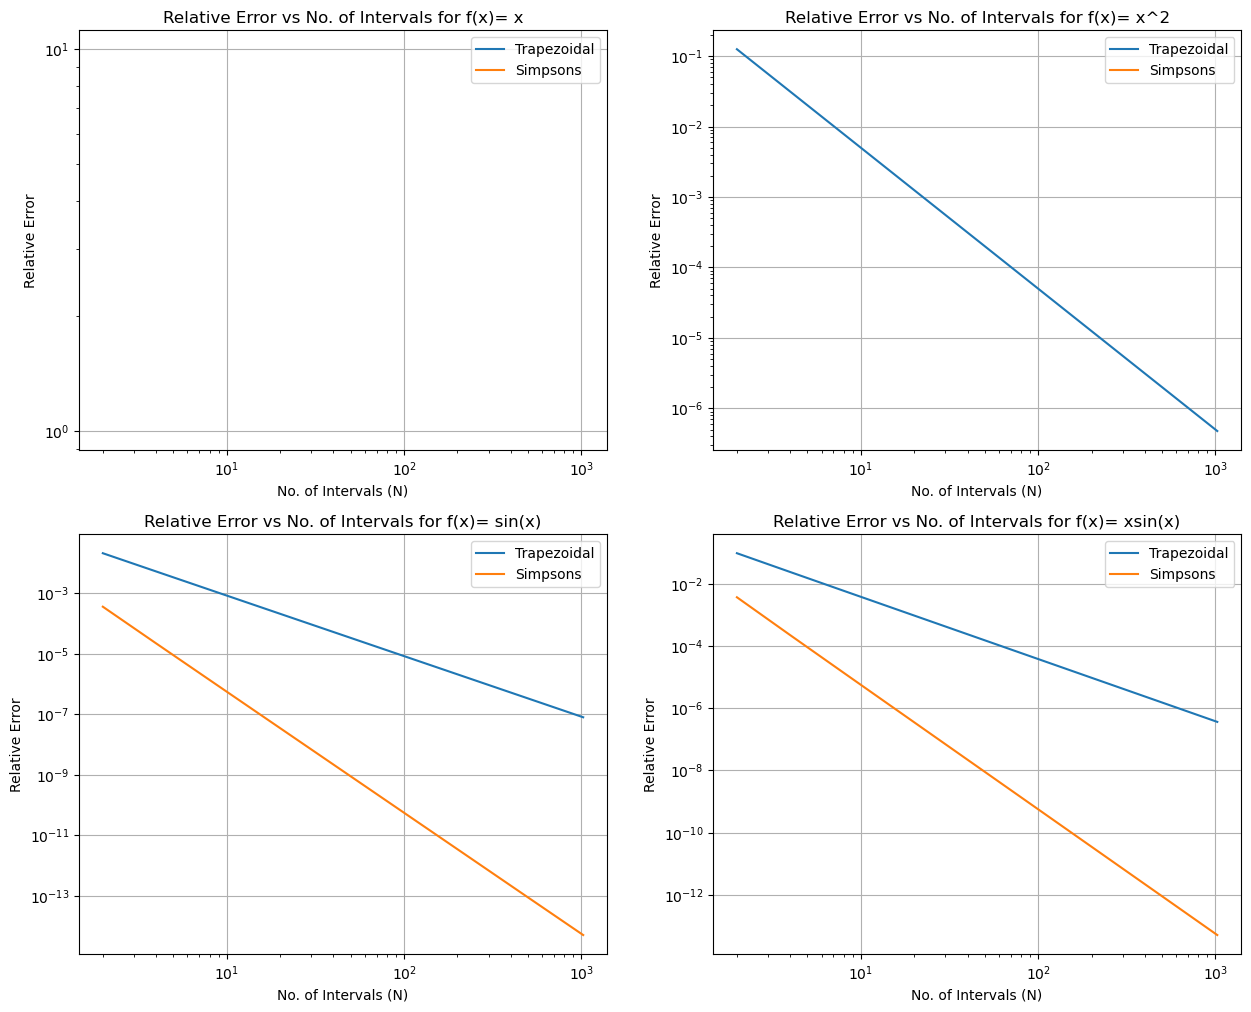

In [4]:
# Function to perform numerical integration using Trapezoidal rule
def trapezoid(func, a, b, N):
    x = np.linspace(a, b, N + 1)
    y = func(x)
    h = (b - a) / N
    integral = h * (np.sum(y) - 0.5 * (y[0] + y[N]))
    return integral

# Function to perform numerical integration using Simpson's rule
def simpsons(func, a, b, N):
    x = np.linspace(a, b, N + 1)
    y = func(x)
    h = (b - a) / N
    integral = h / 3 * (y[0] + y[N] + 4 * np.sum(y[1:N:2]) + 2 * np.sum(y[2:N:2]))
    return integral

# Define the functions to integrate
def func1(x):
    """x"""
    return x

def func2(x):
    """x^2"""
    return x**2

def func3(x):
    """sin(x)"""
    return np.sin(x)

def func4(x):
    """xsin(x)"""
    return x * np.sin(x)

# Answers of the integrals solves using analytical method
analytical_anss = [1/2, 1/3, 1 - np.cos(1), np.sin(1) - np.cos(1)]

# List of the function to iterate over
functions = [func1, func2, func3, func4]

# Dictionary for storing relative errors for each function occurring due to consequence of using Simpsons and Trapezoidal Method
error_dict={}

for func in functions :
    trap_error_func=[]
    simps_error_func=[]
    for i in range(1,11):
        trap_ans = trapezoid(func, 0, 1, N=2**i)
        simps_ans = simpsons(func, 0, 1, N=2**i)
        analytical_ans = analytical_anss[functions.index(func)]
        #print("Trap Answer:",trap_ans,", Relative Error:", abs((trap_ans-analytical_ans)/analytical_ans))
        trap_error_func.append(abs((trap_ans-analytical_ans)/analytical_ans))
        #print("Simps Answer:",simps_ans,", Relative Error:", abs((simps_ans-analytical_ans)/analytical_ans))
        simps_error_func.append(abs((simps_ans-analytical_ans)/analytical_ans))
    error_dict[func.__doc__]=[trap_error_func,simps_error_func]

func = list(error_dict.keys())
t=0
fig, axes = plt.subplots(2,2, figsize=(15, 12))
for i in [0, 1]:
    for j in [0,1]:
        axes[i,j].plot([2**i for i in range(1,11)], error_dict[func[t]][0])
        axes[i,j].plot([2**i for i in range(1,11)], error_dict[func[t]][1])
        axes[i,j].legend(['Trapezoidal', 'Simpsons'])
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_title('Relative Error vs No. of Intervals for f(x)= '+func[t])
        axes[i,j].set_ylabel('Relative Error')
        axes[i,j].set_xlabel('No. of Intervals (N)')
        axes[i,j].grid(True)
        t=t+1

# Problem 3
The solution to the analytical approach is given in the report.

In [5]:
# Define the function to integrated
def integrand(x):
    return np.sin(x)**2 / x**2

# Numerical integration using quad
result, _ = quad(integrand, -np.inf, np.inf)

print("Numerical result:", result)
print("Analytical result:", np.pi)

error = abs((result-np.pi)/np.pi)
print("Relative Error:",error)

Numerical result: 3.1417357698907553
Analytical result: 3.141592653589793
Relative Error: 4.5555333470322475e-05


# Problem 4

#### Problem 4.1
Analytical approach to this problem involves calculation of error function.

In [6]:
# Analytical Solution

# Define the variable and the function
x = sp.symbols('x')
f = x**2 * sp.exp(-x**2)

# Calculate the definite integral
integral_result = sp.integrate(f, (x, -1, 1))

print("Analytical result:", integral_result)

Analytical result: -exp(-1) + sqrt(pi)*erf(1)/2


Analytical Result:  0.37894469164098454


No. of Nodes: 2
nodes:  [-0.57735027  0.57735027]
weights:  [1. 1.]
2-point Gaussian Quadrature result: 0.47768754038252614
Relative Error:  0.26057324701909645


No. of Nodes: 3
nodes:  [-0.77459667  0.          0.77459667]
weights:  [0.55555556 0.88888889 0.55555556]
3-point Gaussian Quadrature result: 0.36587442406268444
Relative Error:  0.03449122752373315


No. of Nodes: 5
nodes:  [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
weights:  [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]
5-point Gaussian Quadrature result: 0.3788732388655378
Relative Error:  0.00018855726712337537




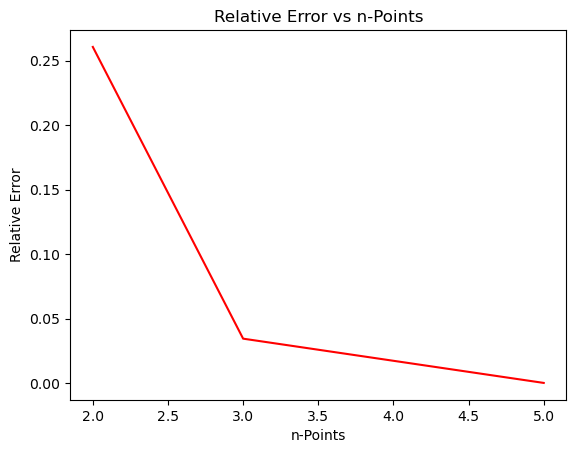

In [7]:
# Define the integrand function
def f(x):
    return x**2 * np.exp(-(x**2))

analytical_result = -np.exp(-1) + np.sqrt(np.pi)*erf(1)/2 # using the reason obtained analytically
print('Analytical Result: ',analytical_result)
print('\n')

relative_error_list = []

# Number of points for Gaussian Quadrature
for n in [2,3,5]:
    # Calculate nodes and weights using Legendre polynomial
    nodes, weights = np.polynomial.legendre.leggauss(n)
    print("No. of Nodes:",n)
    print('nodes: ',nodes) #aka Quadrature points
    print('weights: ',weights)
    # Calculate the integral approximation
    result = sum(weights * f(nodes))
    print(f"{n}-point Gaussian Quadrature result:", result)
    relative_error = abs(result-analytical_result)/analytical_result
    relative_error_list.append(relative_error)
    print("Relative Error: ", relative_error)
    print("\n")

# Plotting Relative Error against n-Points
plt.plot([2,3,5],relative_error_list, color='r')
plt.title("Relative Error vs n-Points")
plt.xlabel('n-Points')
plt.ylabel('Relative Error');

#### Problem 4.2
Analytical solution of this problem involves elliptic integrals.

In [8]:
# Analytical Solution

# Define the variable and the function
x = sp.symbols('x')
f = sp.sqrt(2 - sp.sin(x)**2)

# Calculate the definite integral
integral_result = sp.integrate(f, (x, 0, sp.pi))

print("Analytical result:", integral_result)

Analytical result: 2*sqrt(2)*elliptic_e(1/2)


Analytical Arc Length : 3.8201977890277123


2-point Gaussian Quadrature result: 3.9989762910745297
Percentage Error Error:  4.679823190314936


3-point Gaussian Quadrature result: 3.7892054214626487
Percentage Error Error:  0.8112765169928955


5-point Gaussian Quadrature result: 3.8187923611667065
Percentage Error Error:  0.03678940040859863




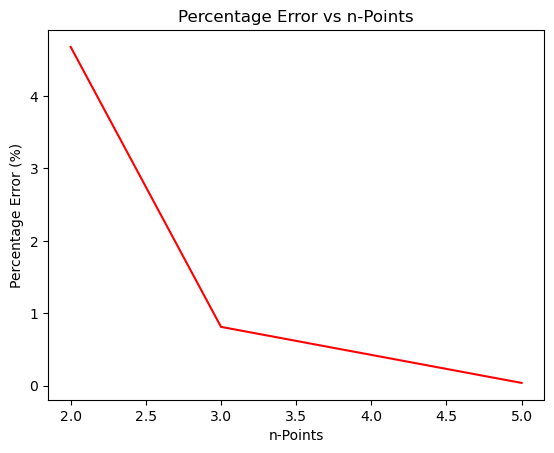

In [9]:
# Analytical value of arc length
k = np.pi
m = 1/2
analytical_arc_length = 2 * np.sqrt(2) * ellipe(0.5) # Using the result obtained analytically
print("Analytical Arc Length :",analytical_arc_length)
print("\n")

# Function to be integrated
def integrand(x):
    return np.sqrt(1 + (np.cos(x))**2)

percentage_error_list = []

for i in [2, 3, 5]:
    result,_ = fixed_quad(integrand, 0, np.pi, n=i)
    print(f"{i}-point Gaussian Quadrature result:", result)
    percentage_error = abs(result-analytical_arc_length)*100/analytical_arc_length
    percentage_error_list.append(percentage_error)
    print("Percentage Error Error: ", percentage_error)
    print("\n")

# Plotting Percentage Error against n-Points
plt.plot([2,3,5],percentage_error_list, color='r')
plt.title("Percentage Error vs n-Points")
plt.xlabel('n-Points')
plt.ylabel('Percentage Error (%)');

# Problem 5

Let's simplify the functions before solving them numerically
<br>Given  $\alpha = 4 kg/sec^{2},m = 1kg, \space a$ and $b$ such that $V(a)=E$ and $V(b)=E$ and $V (x)<E$ for $a < x < b$.<br>
<br>$T=2\sqrt{\frac{m}{2}}\int_{x=a}^{x=b} \frac{dx'}{\sqrt{E-V(x')}}$ <br><br>
<b>For case 1:</b> $V(x) = \alpha x^2/2$<br>
At the boundaries $a$ and $b$, we have $V(a)=V(b)=E$ since E is conserved.<br>
$\therefore \alpha a^2/2 = \alpha b^2/2 \rightarrow  a=\pm b $
   but since  <br> $a\neq b \rightarrow a=-b$<br>
$T=2\sqrt{\frac{m}{2}}\int_{x=-b}^{x=b} \frac{dx'}{\sqrt{\alpha b^2/2-\alpha x^2/2}}=2\pi\sqrt{\frac{m}{\alpha}}$ (analytically)
<br>We will call the integral term at the end as time period integral <br><br>
<b>For case 2:</b> $V(x) = \exp(\alpha x^2/2)-1$<br>
At the boundaries $a$ and $b$, we have $V(a)=V(b)=E$ since E is conserved.<br>
$\therefore \exp(\alpha a^2/2)-1 = \exp(\alpha b^2/2)-1 \rightarrow  a=\pm b $
   but since  <br> $a\neq b \rightarrow a=-b$<br>
   $T=2\sqrt{\frac{m}{2}}\int_{x=-b}^{x=b} \frac{dx'}{\sqrt{\exp(\alpha b^2/2)-\exp(\alpha x^2/2)}}=2\pi\sqrt{\frac{m}{\alpha\exp(\alpha x^2/2)}}$ (analytically)


Time Period (T) for V1 
 Expected:3.141592653589793 
 Calculated:3.141592653589599 
 Relative Error:6.177343981331364e-14


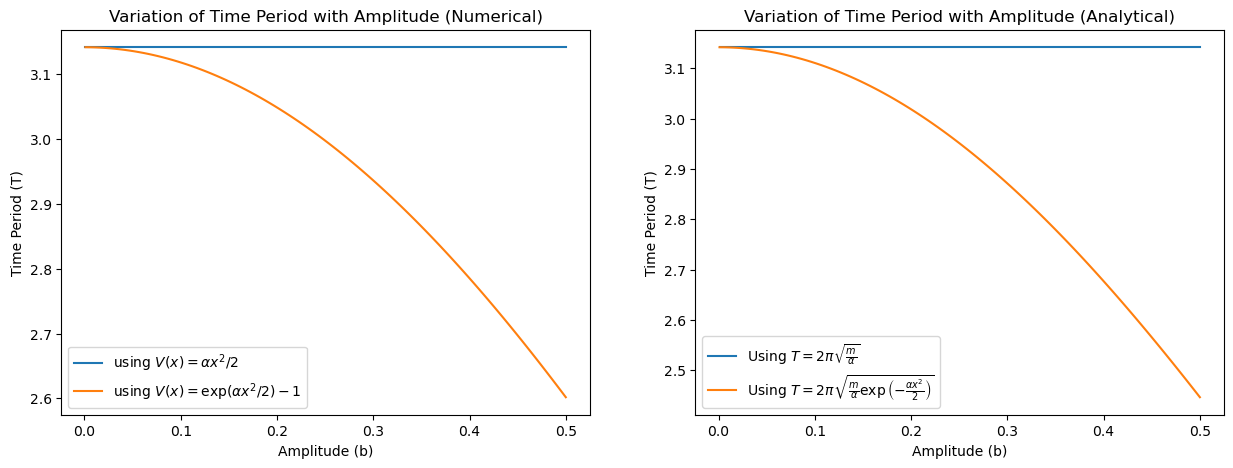

In [10]:
from scipy.integrate import quad
m = 1
alpha = 4
b = 1

# Defining functions for potentials
def V1(x):
    return alpha*x**2/2

def V2(x):
    return np.exp(alpha*x**2/2)-1

# Defining functions for calculating time period for particular potential
# Since E=V(b)
def T1(x):
    return 2*np.sqrt(m/2)*np.sqrt(1/(V1(b)-V1(x)))

def T2(x):
    return 2*np.sqrt(m/2)*np.sqrt(1/(V2(b)-V2(x)))

# 
def time_period(T):
    return quad(T,-b, b)[0]

T = time_period(T1)
print(f"Time Period (T) for V1 \n Expected:{np.pi} \n Calculated:{T} \n Relative Error:{abs((T-np.pi)/np.pi)}")

bs = np.linspace(0.001,0.5,100)

T1n = []
T2n = []
for b in bs:
    T1n.append(time_period(T1))
    T2n.append(time_period(T2))
    
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(bs, T1n, label=r"using $V(x) = \alpha x^2/2$")
axes[0].plot(bs, T2n, label=r"using $V(x) = \exp(\alpha x^2/2)-1$")
axes[0].set_title('Variation of Time Period with Amplitude (Numerical)')
axes[0].set_xlabel('Amplitude (b)')
axes[0].set_ylabel('Time Period (T)')
axes[0].legend()


T1a = np.ones_like(bs)*2*np.pi*np.sqrt(m/alpha)
T2a = 2*np.pi*np.sqrt(m/(alpha*np.exp(alpha*(bs**2)/2)))
axes[1].plot(bs, T1a, label=r"Using $T = 2\pi\sqrt{\frac{m}{\alpha}}$")
axes[1].plot(bs, T2a, label=r"Using $T = 2\pi\sqrt{\frac{m}{\alpha}\exp\left(-\frac{\alpha x^2}{2}\right)}$")
axes[1].set_title('Variation of Time Period with Amplitude (Analytical)')
axes[1].set_xlabel('Amplitude (b)')
axes[1].set_ylabel('Time Period (T)')
axes[1].legend();

#### The End